In [1]:
import numpy as np
import pandas as pd
import scipy as st
import cvxpy as cp
import matplotlib.pyplot as plt
import math

In [2]:
train_cat=np.matrix(np.loadtxt('train_cat.txt',delimiter=','))
train_grass=np.matrix(np.loadtxt('train_grass.txt',delimiter=','))

In [3]:
Y=plt.imread('cat_grass.jpg')/255
M,N=np.shape(Y)

In [4]:
mean_cat=np.mean(train_cat)
mean_grass=np.mean(train_grass)
cov_cat=np.cov(train_cat)
cov_grass=np.cov(train_grass)
prior_grass=9556/(9556+1976)
prior_cat=1976/(9556+1976)
det_cat=np.linalg.det(cov_cat)
det_grass=np.linalg.det(cov_grass)
cov_inv_cat=np.linalg.pinv(cov_cat)
cov_inv_grass=np.linalg.pinv(cov_grass)

In [5]:
def gradient(x,x0,lambdaa):
    parta=2*(x-x0)
    g_j=-0.5*(x-mean_cat).T@cov_inv_cat@(x-mean_cat)-0.5*np.log(det_cat)+np.log(prior_cat)
    g_t=-0.5*(x-mean_grass).T@cov_inv_grass@(x-mean_grass)-0.5*np.log(det_grass)+np.log(prior_grass)
    if (g_j-g_t>0):
        partb=(((x-mean_cat).T@cov_inv_cat)-((x-mean_grass).T@cov_inv_grass)).T
    else:
        partb=np.zeros((64,1))
    gradient=parta-lambdaa*partb
    return(gradient)

In [6]:
def cwattack(x,a,b,lambdaa,alpha,chosen):
    op=np.copy(x)
    itr=0
    change=100
    count_cat=[]
    count_grass=[]
    count_iterations=[]
    total_change=[]
    cc=a
    dd=b
    while (itr<300 and change>=0.001):
        prv=np.copy(op)
        for i in range(0,a-8,8):
            for j in range(0,b-8,8):
                z=op[i:i+8,j:j+8]
                x0=x[i:i+8,j:j+8]
                x0=x0.flatten('F')
                x0=np.asmatrix((x0)).T
                kv=z.flatten('F')
                zv=np.asmatrix((kv)).T
                pv=np.clip(zv-alpha*gradient(zv,x0,lambdaa),0.0,1.0)
                new=np.reshape(pv,(8,8),order='F')
                op[i:i+8,j:j+8]=new
        change=np.linalg.norm(op-prv)
#         print(change)
        opq=np.copy(op)
        if ((itr+1)%chosen==0):
            total_change.append(change)
            cat=nclassification(op,a,b,method="check_cat")
            count_cat.append(cat)
            grass=nclassification(opq,cc,dd,method="check_grass")
            count_grass.append(grass)
            count_iterations.append(itr)
            suma=nclassification(op,a,b,"classification")
            print("Classifier output when the iteration is ",itr+1)
            plt.imshow(suma*255,cmap='gray')           
            plt.show()
            
        itr=itr+1
    #plot of the frobenius norm of perturbation
    plt.scatter(count_iterations,total_change)
    plt.title('plot of the frobenius norm of perturbation')
    plt.show()
    #plot showing number of image classified as cat and grass
    plt.plot(count_iterations,count_cat)
    plt.title('Number of iterations Vs cat classified patches')
    plt.show()
    plt.plot(count_iterations,count_grass)
    plt.title('Number of iterations Vs grass classified patches')
    plt.show()
    #final attack image
    plt.imshow(op*255, cmap='gray')
    plt.title('Final perturbed image')
    plt.show()
    #perturbation added to the original image to obtain the attack
    plt.imshow((x-op)*255,cmap='gray')
    plt.title('Perturbation added to the original image to obtain the attack')
    plt.show()
    sums=nclassification(op,a,b,"classification")
    plt.imshow(sums*255,cmap='gray')           
    plt.title("Classifier output on the final image")
    plt.show()
    return(op)

In [7]:
def nclassification(x,a,b,method):
    out=np.zeros((a,b))
    count_cat=0
    count_grass=0
    for i in range(0,a-8,8):
        for j in range(0,b-8,8):
            z=x[i:i+8,j:j+8]
            za=z.flatten('F')
            zb=np.asmatrix(za).T
            g_j=-0.5*(zb-mean_cat).T@cov_inv_cat@(zb-mean_cat)-0.5*np.log(det_cat)+np.log(prior_cat)
            g_t=-0.5*(zb-mean_grass).T@cov_inv_grass@(zb-mean_grass)-0.5*np.log(det_grass)+np.log(prior_grass)
            if (g_j-g_t>0):
                out[i:i+8,j:j+8]=1
                count_cat=count_cat+1
            else:
                count_grass=count_grass+1
    if(method=="check_cat"):
        return (count_cat)
    elif(method=="check_grass"):
        return (count_grass)
    elif(method=="classification"):
        return (out)

# for lambda=1 and plots for every 50 iterations

Classifier output when the iteration is  50


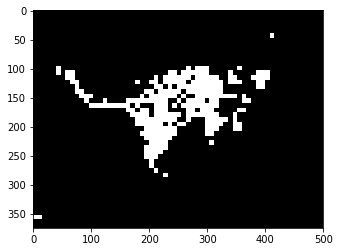

Classifier output when the iteration is  100


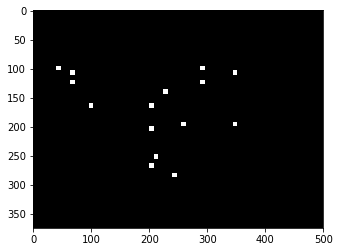

Classifier output when the iteration is  150


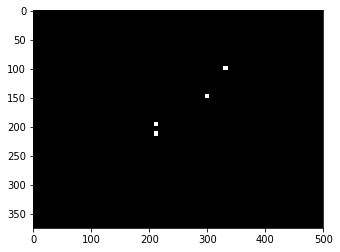

Classifier output when the iteration is  200


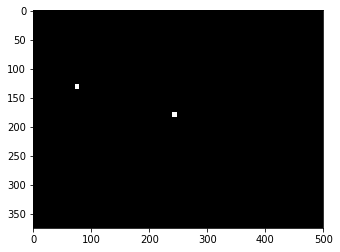

Classifier output when the iteration is  250


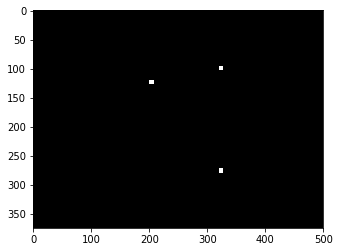

Classifier output when the iteration is  300


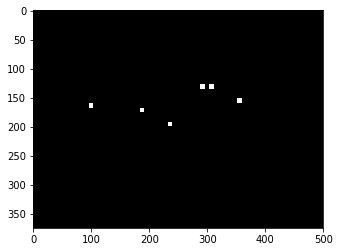

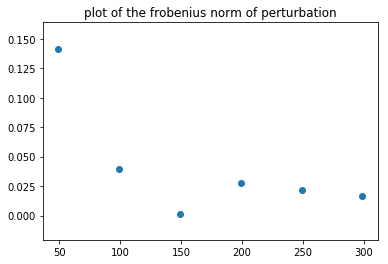

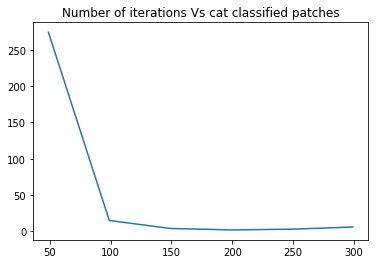

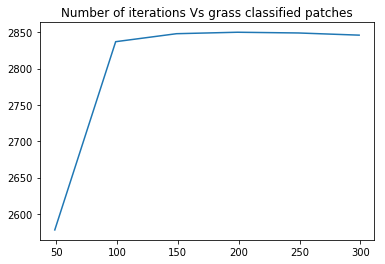

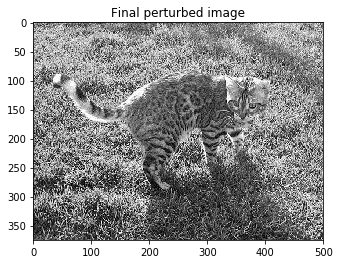

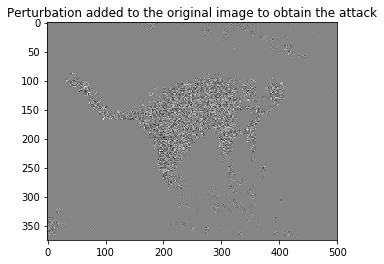

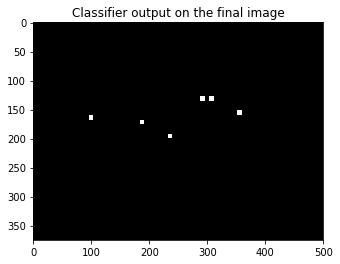

In [8]:
a21=cwattack(Y,M,N,1,0.0001,50)

# for lambda=5 and plots for every 10 iterations

Classifier output when the iteration is  10


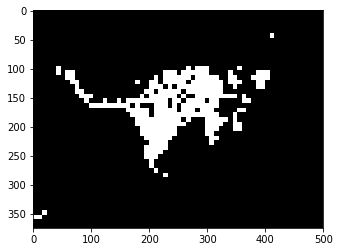

Classifier output when the iteration is  20


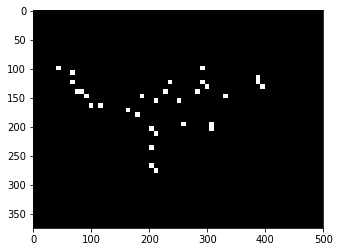

Classifier output when the iteration is  30


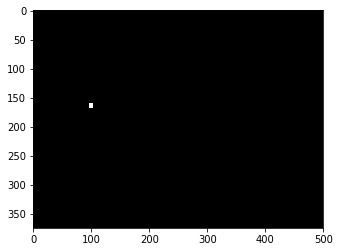

Classifier output when the iteration is  40


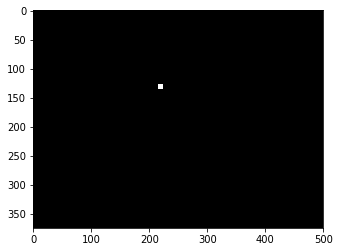

Classifier output when the iteration is  50


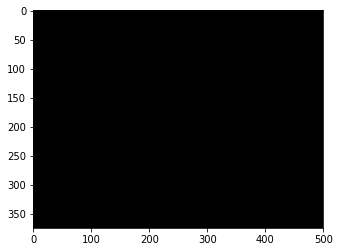

Classifier output when the iteration is  60


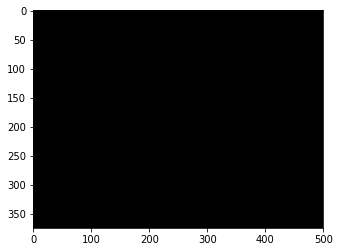

Classifier output when the iteration is  70


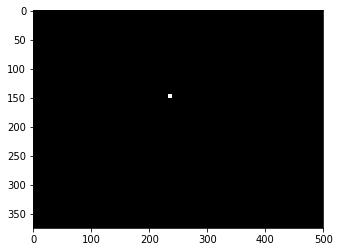

Classifier output when the iteration is  80


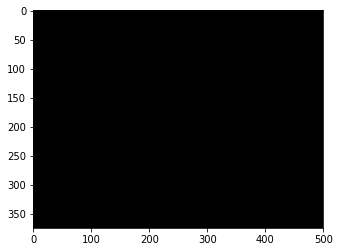

Classifier output when the iteration is  90


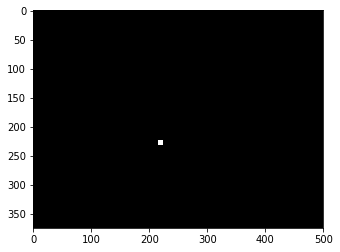

Classifier output when the iteration is  100


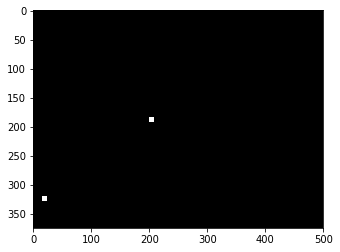

Classifier output when the iteration is  110


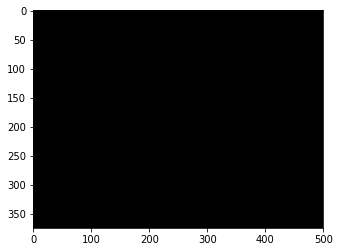

Classifier output when the iteration is  120


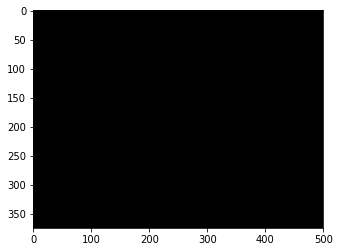

Classifier output when the iteration is  130


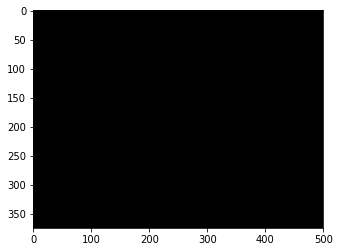

Classifier output when the iteration is  140


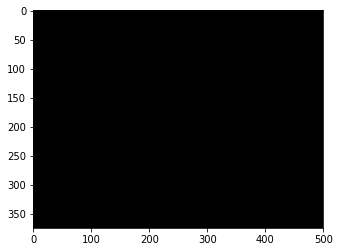

Classifier output when the iteration is  150


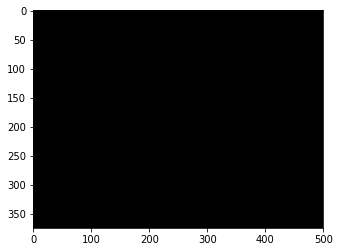

Classifier output when the iteration is  160


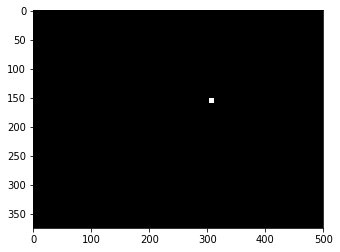

Classifier output when the iteration is  170


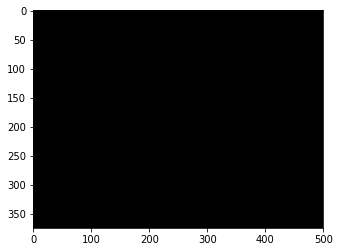

Classifier output when the iteration is  180


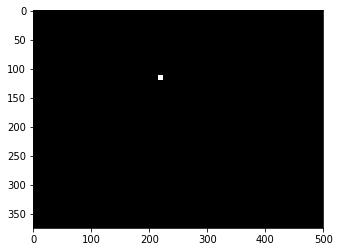

Classifier output when the iteration is  190


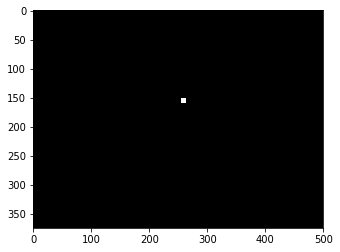

Classifier output when the iteration is  200


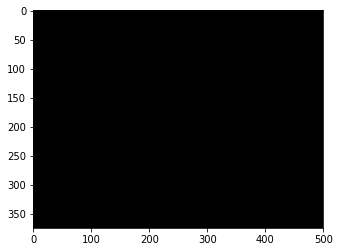

Classifier output when the iteration is  210


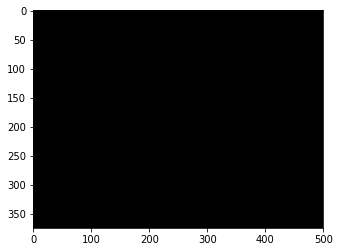

Classifier output when the iteration is  220


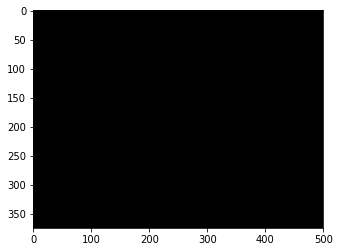

Classifier output when the iteration is  230


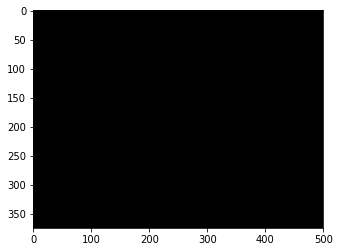

Classifier output when the iteration is  240


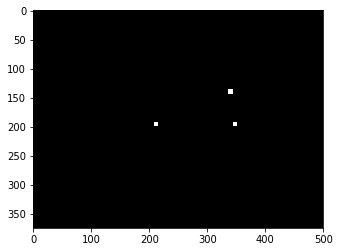

Classifier output when the iteration is  250


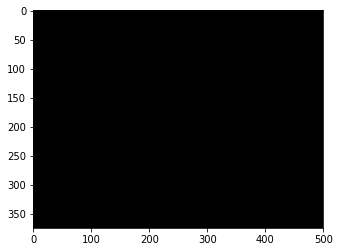

Classifier output when the iteration is  260


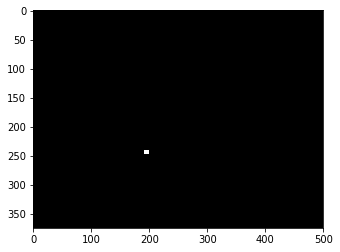

Classifier output when the iteration is  270


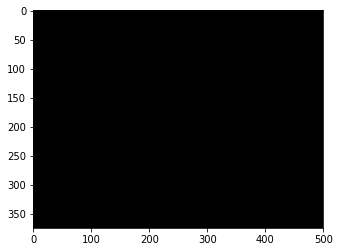

Classifier output when the iteration is  280


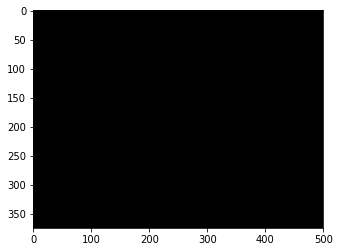

Classifier output when the iteration is  290


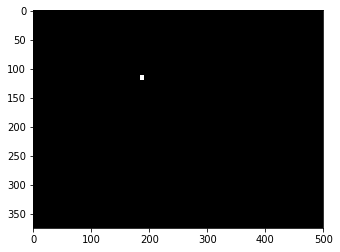

Classifier output when the iteration is  300


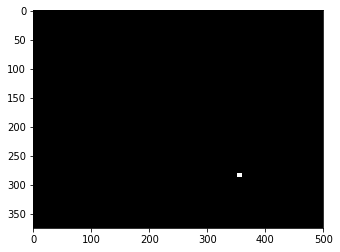

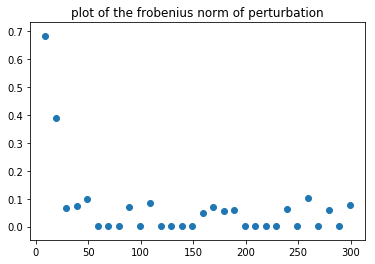

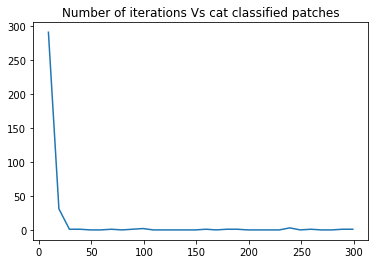

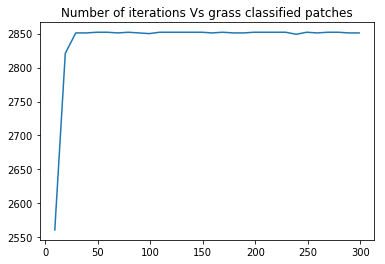

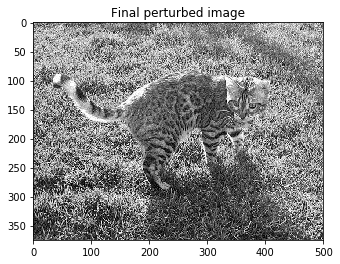

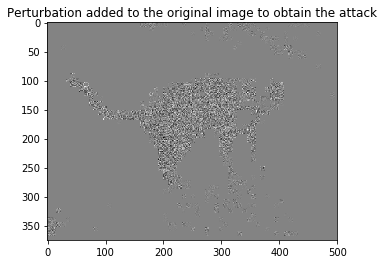

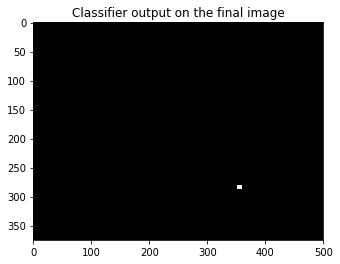

In [9]:
a22=cwattack(Y,M,N,5,0.0001,10)

# for lambda=10 and plots for every 5 iterations

Classifier output when the iteration is  5


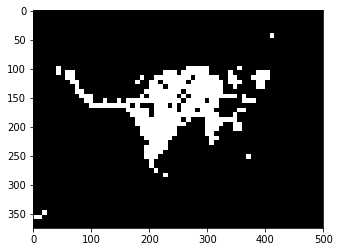

Classifier output when the iteration is  10


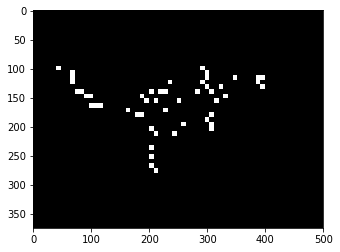

Classifier output when the iteration is  15


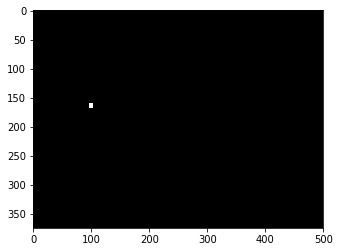

Classifier output when the iteration is  20


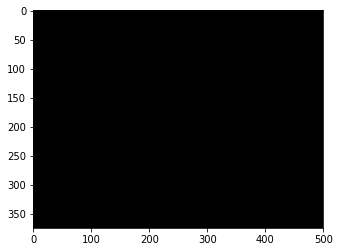

Classifier output when the iteration is  25


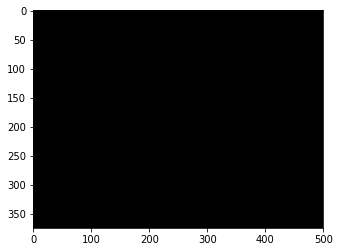

Classifier output when the iteration is  30


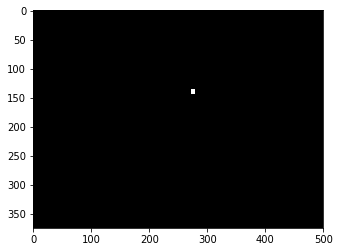

Classifier output when the iteration is  35


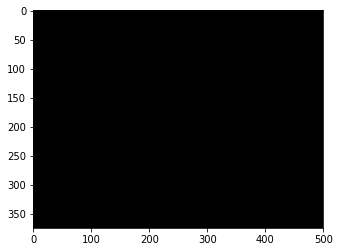

Classifier output when the iteration is  40


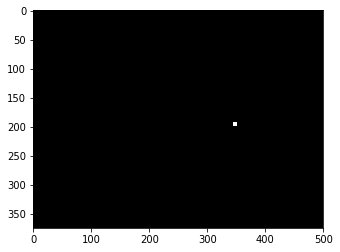

Classifier output when the iteration is  45


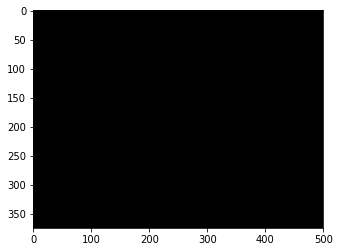

Classifier output when the iteration is  50


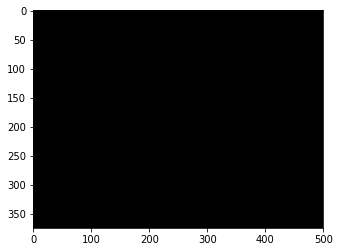

Classifier output when the iteration is  55


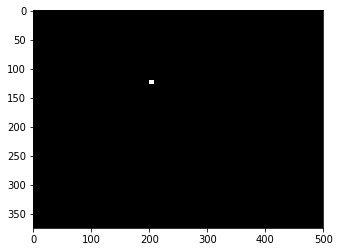

Classifier output when the iteration is  60


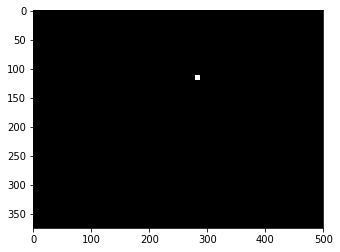

Classifier output when the iteration is  65


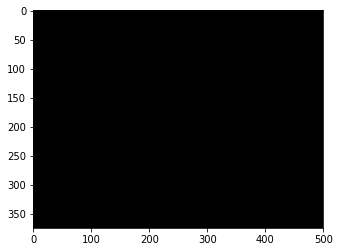

Classifier output when the iteration is  70


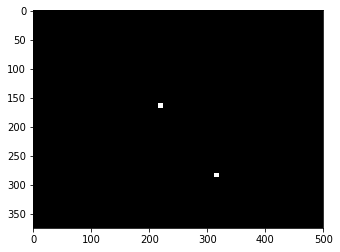

Classifier output when the iteration is  75


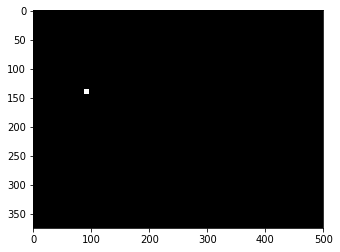

Classifier output when the iteration is  80


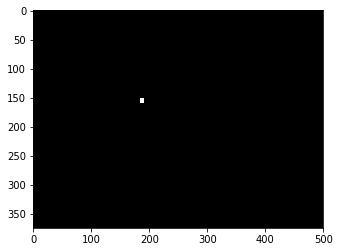

Classifier output when the iteration is  85


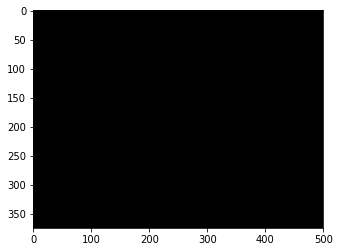

Classifier output when the iteration is  90


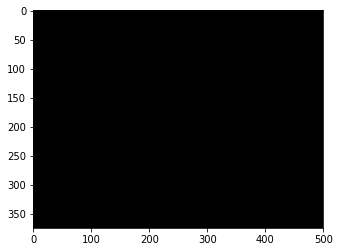

Classifier output when the iteration is  95


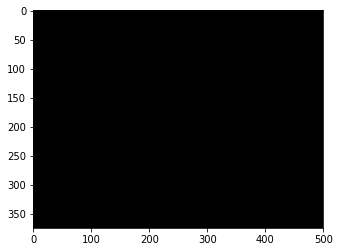

Classifier output when the iteration is  100


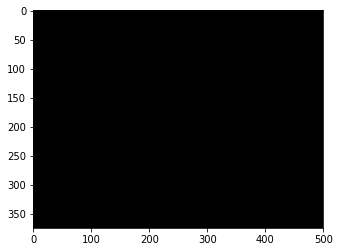

Classifier output when the iteration is  105


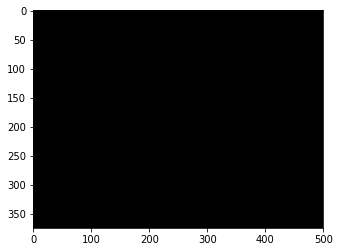

Classifier output when the iteration is  110


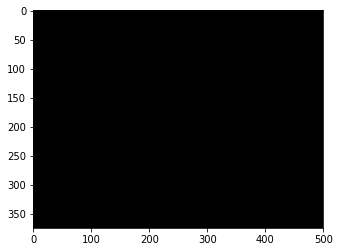

Classifier output when the iteration is  115


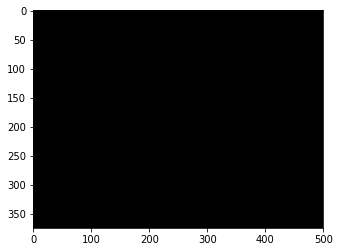

Classifier output when the iteration is  120


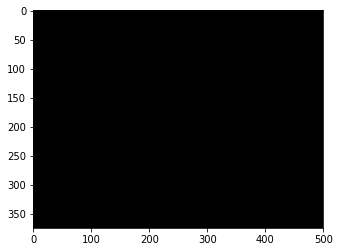

Classifier output when the iteration is  125


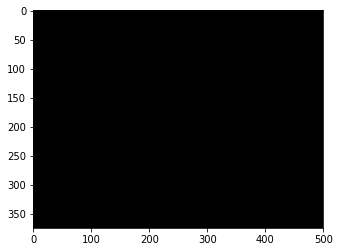

Classifier output when the iteration is  130


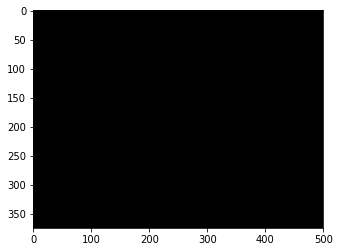

Classifier output when the iteration is  135


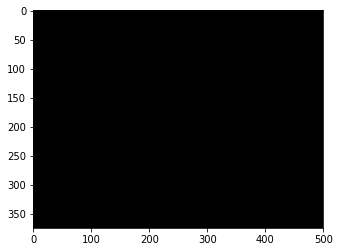

Classifier output when the iteration is  140


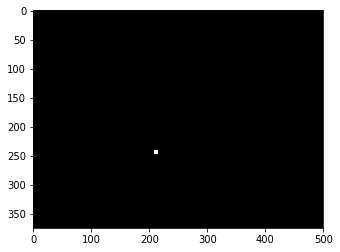

Classifier output when the iteration is  145


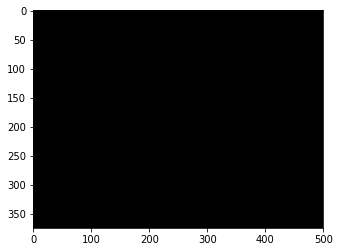

Classifier output when the iteration is  150


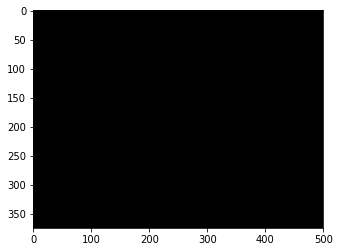

Classifier output when the iteration is  155


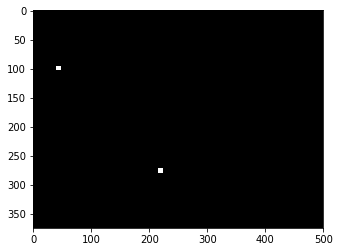

Classifier output when the iteration is  160


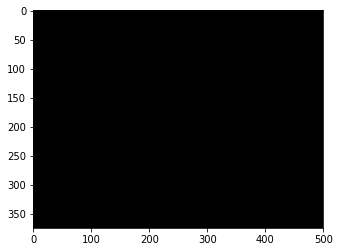

Classifier output when the iteration is  165


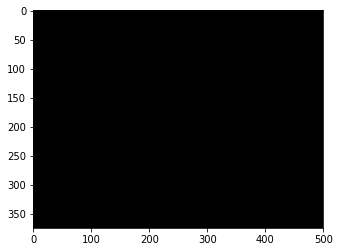

Classifier output when the iteration is  170


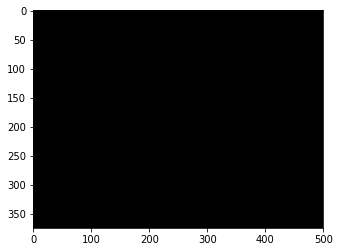

Classifier output when the iteration is  175


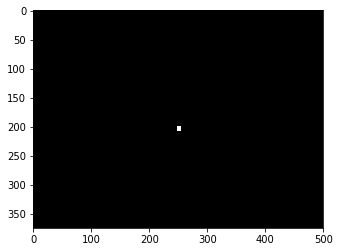

Classifier output when the iteration is  180


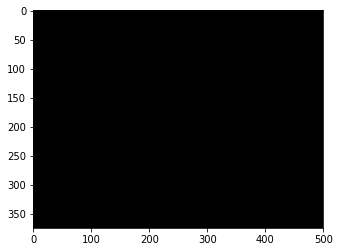

Classifier output when the iteration is  185


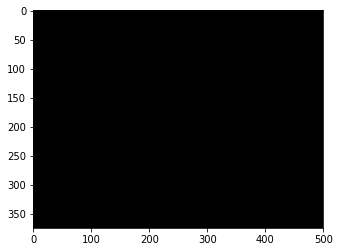

Classifier output when the iteration is  190


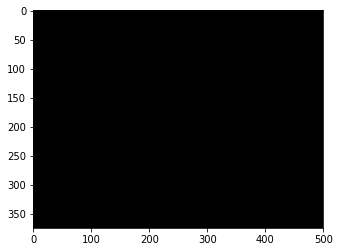

Classifier output when the iteration is  195


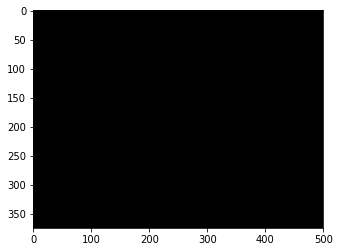

Classifier output when the iteration is  200


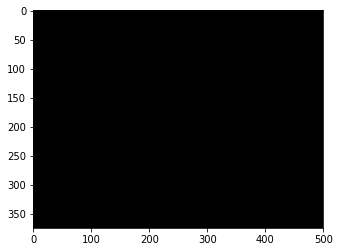

Classifier output when the iteration is  205


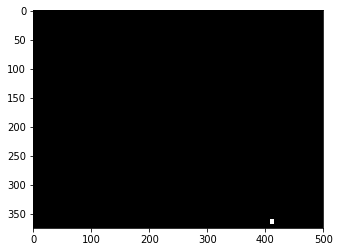

Classifier output when the iteration is  210


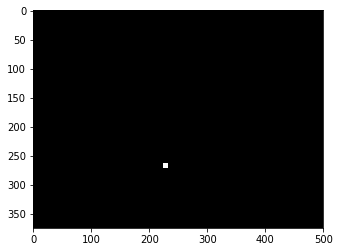

Classifier output when the iteration is  215


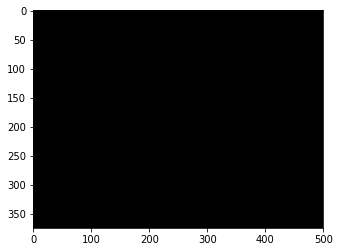

Classifier output when the iteration is  220


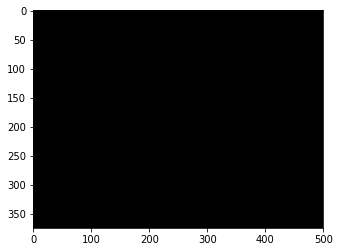

Classifier output when the iteration is  225


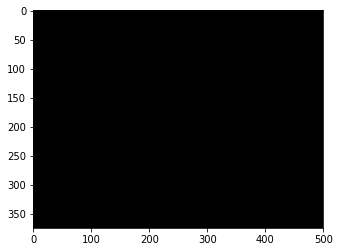

Classifier output when the iteration is  230


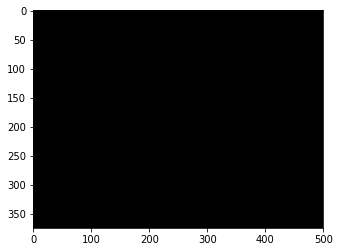

Classifier output when the iteration is  235


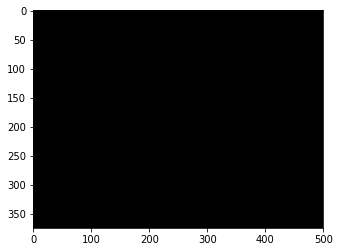

Classifier output when the iteration is  240


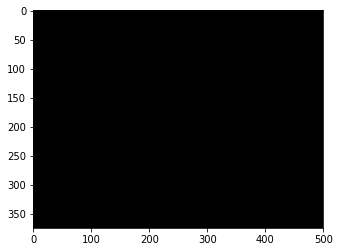

Classifier output when the iteration is  245


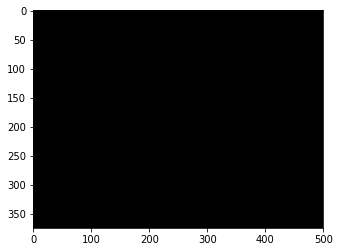

Classifier output when the iteration is  250


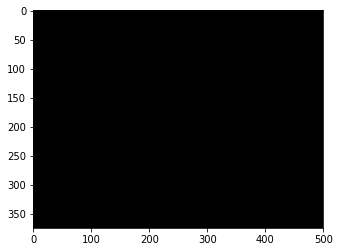

Classifier output when the iteration is  255


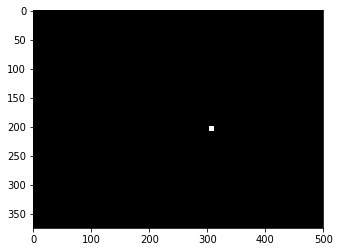

Classifier output when the iteration is  260


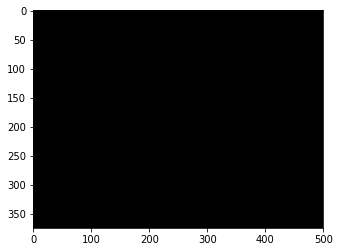

Classifier output when the iteration is  265


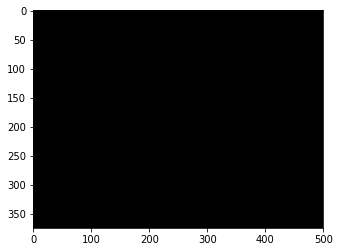

Classifier output when the iteration is  270


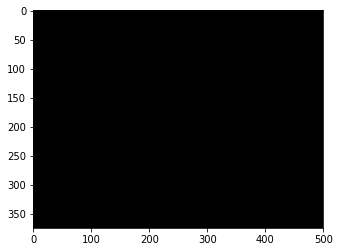

Classifier output when the iteration is  275


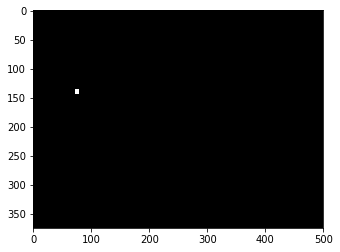

Classifier output when the iteration is  280


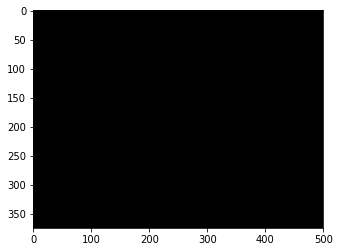

Classifier output when the iteration is  285


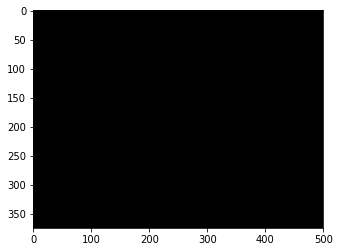

Classifier output when the iteration is  290


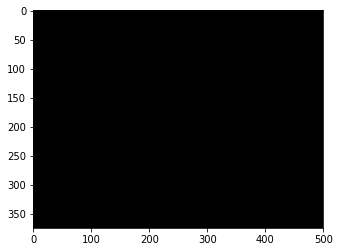

Classifier output when the iteration is  295


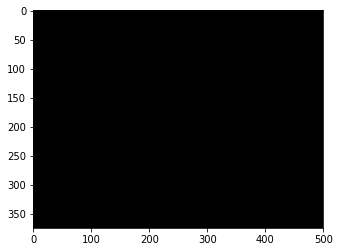

Classifier output when the iteration is  300


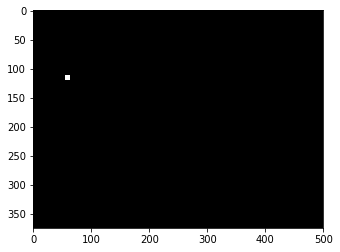

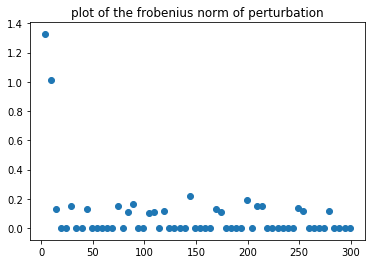

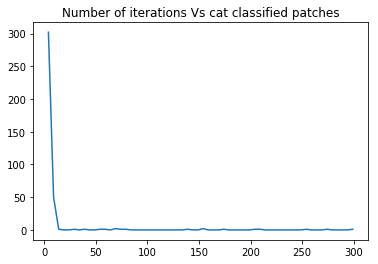

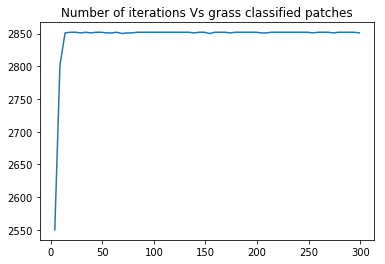

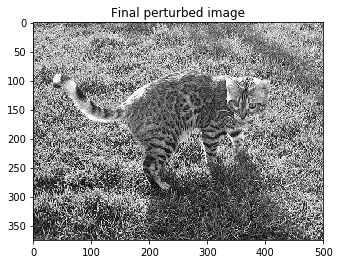

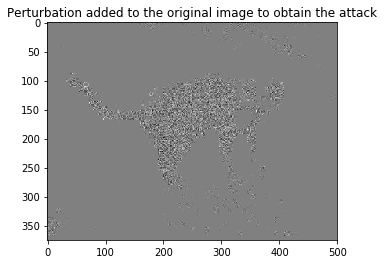

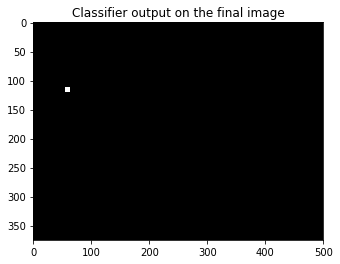

In [10]:
a23=cwattack(Y,M,N,10,0.0001,5)

From the plots showing the amount of grass patches and cat patches it is can be inferred that as the lambda value increases the attack happens in a better rate. This inference can also be validated with the Frobenius norm scatter plot which also says that for optimal lambda value makes the frobenius change in a continously decreasing rather than fluctuating which can be observed when lambda=1.

In [11]:
def gradient3(x,x0,lambdaa,c,d):
    grad1=2*(x-x0)
    grad2=np.zeros((c,d))
    for aa in range(c-8):
        for bb in range(d-8):
            xx=x[aa:aa+8,bb:bb+8]
            xx=xx.flatten('F')
            g_j=-0.5*(xx-mean_cat).T@cov_inv_cat@(xx-mean_cat)-0.5*np.log(det_cat)+np.log(prior_cat)
            g_t=-0.5*(xx-mean_grass).T@cov_inv_grass@(xx-mean_grass)-0.5*np.log(det_grass)+np.log(prior_grass)
            if (g_j-g_t>0):
                grad3=(((xx-mean_cat).T@cov_inv_cat)-((xx-mean_grass).T@cov_inv_grass)).T
                alas=np.reshape(grad3,(8,8),order='F')
                grad2[aa:aa+8,bb:bb+8]=grad2[aa:aa+8,bb:bb+8]+alas
            else:
                continue
    grad=grad1+(lambdaa*grad2)
    return (grad)
def cwattack3(image,a,b,alpha,lambdas,chosen):
    x01=np.copy(image)
    op=np.copy(image)
    itr=0
    change=100000
    count_cat=[]
    count_grass=[]
    count_iterations=[]
    total_change=[]
    while (itr<=300 and change>0.01):
        previousop=np.copy(op)
        imd=gradient3(op,x01,lambdas,a,b)
        op=np.clip(op+(alpha*imd),0.0,1.0)
        change=np.linalg.norm(op-previousop)
#         print(itr,change)
        if ((itr+1)%chosen==0):
            total_change.append(change)
            cat=classification(op,a,b,method="check_cat")
            count_cat.append(cat)
            grass=classification(op,a,b,method="check_grass")
            count_grass.append(grass)
            count_iterations.append(itr)
            print("Perturbed image when the iteration is ",itr+1)
            plt.imshow(op*255,cmap='gray')   
            plt.show()
        itr=itr+1
    #plot of the frobenius norm of perturbation
    plt.scatter(count_iterations,total_change)
    plt.title('plot of the frobenius norm of perturbation')
    plt.show()
    #plot showing number of image classified as cat and grass
    plt.plot(count_iterations,count_cat)
    plt.title('Number of iterations Vs cat classified patches')
    plt.show()
    plt.plot(count_iterations,count_grass)
    plt.title('Number of iterations Vs grass classified patches')
    plt.show()
    #final attack image
    plt.imshow(op*255, cmap='gray')
    plt.title('Final perturbed image')
    plt.show()
    #perturbation added to the original image to obtain the attack
    plt.imshow((image-op)*255,cmap='gray')
    plt.title('Perturbation added to the original image to obtain the attack')
    plt.show()
    sums=classification(op,a,b,"classification")
    plt.imshow(sums*255,cmap='gray')           
    plt.title("Classifier output on the final image")
    plt.show()
def classification(x,a,b,method):
    out=np.zeros((a,b))
    count_cat=0
    count_grass=0
    for i in range(a-8):
        for j in range(b-8):
            z=x[i:i+8,j:j+8]
            za=z.flatten('F')
            zb=np.asmatrix(za).T
            g_j=-0.5*(zb-mean_cat).T@cov_inv_cat@(zb-mean_cat)-0.5*np.log(det_cat)+np.log(prior_cat)
            g_t=-0.5*(zb-mean_grass).T@cov_inv_grass@(zb-mean_grass)-0.5*np.log(det_grass)+np.log(prior_grass)
            if (g_j-g_t>0):
                out[i:i+8,j:j+8]=1
                count_cat=count_cat+1
            else:
                count_grass=count_grass+1
    if(method=="check_cat"):
        return (count_cat)
    elif(method=="check_grass"):
        return (count_grass)
    elif(method=="classification"):
        plt.imshow(out*255,cmap='gray')
        return (out)

# for lambda=0.5 and number of iterations=5

Perturbed image when the iteration is  5


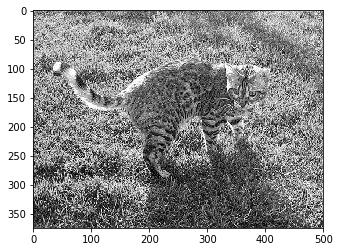

Perturbed image when the iteration is  10


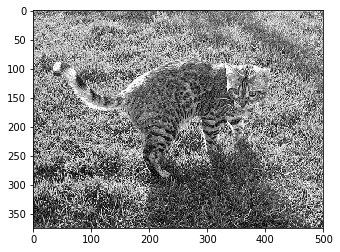

Perturbed image when the iteration is  15


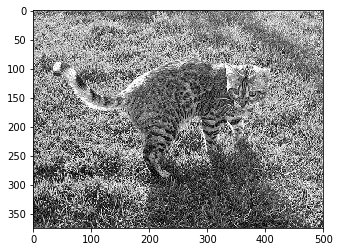

Perturbed image when the iteration is  20


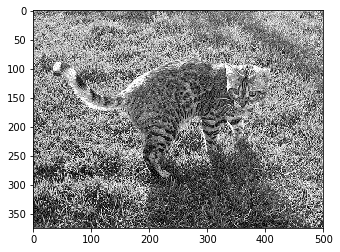

Perturbed image when the iteration is  25


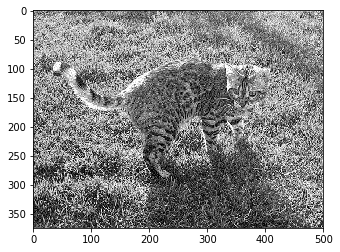

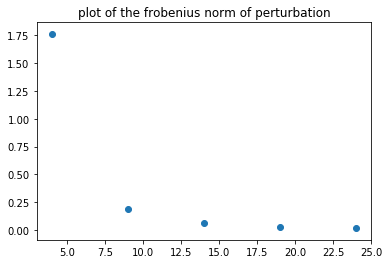

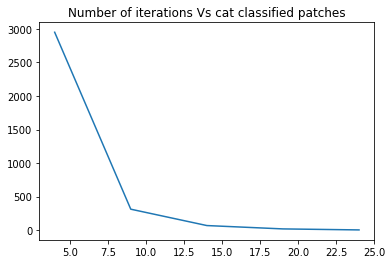

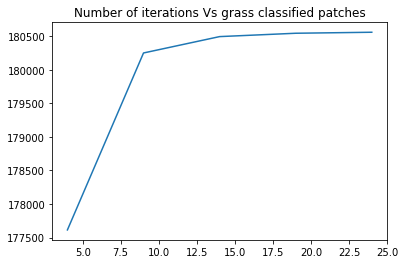

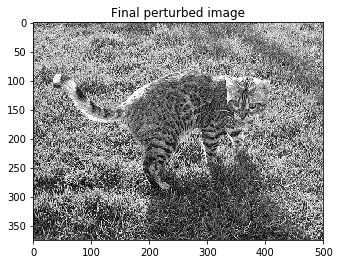

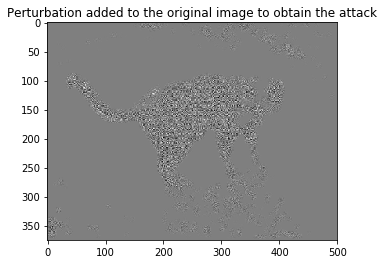

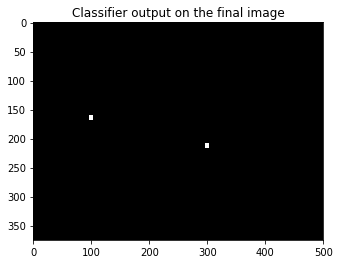

In [12]:
a3=cwattack3(Y,M,N,0.0001,0.5,5)

# for lambda=1 and number of iterations=5

Perturbed image when the iteration is  5


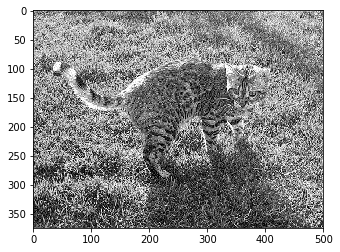

Perturbed image when the iteration is  10


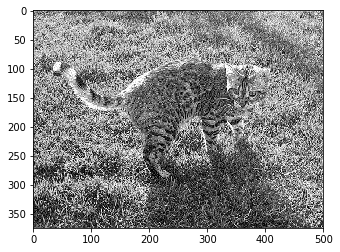

Perturbed image when the iteration is  15


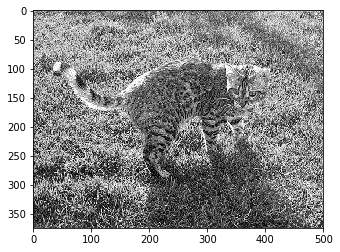

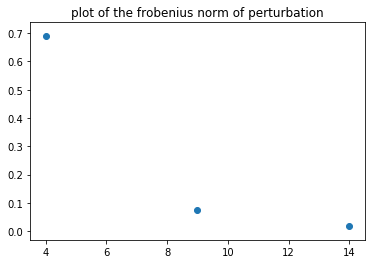

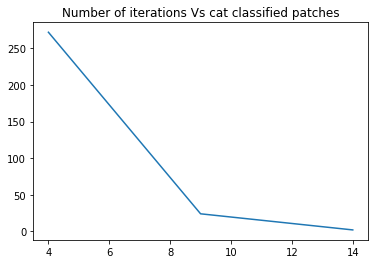

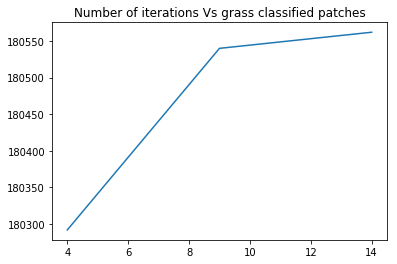

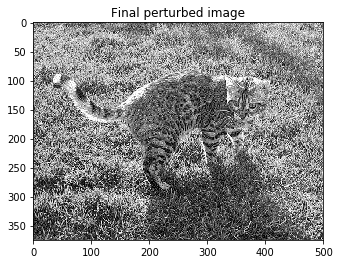

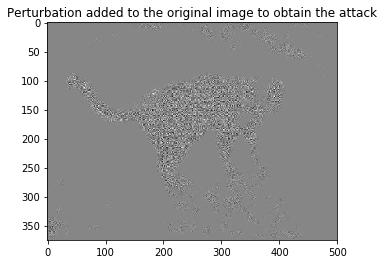

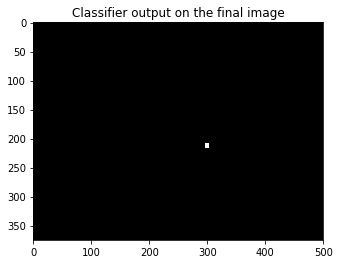

In [13]:
a31=cwattack3(Y,M,N,0.0001,1,5)

# for lambda=1.5 and number of iterations=2

Perturbed image when the iteration is  2


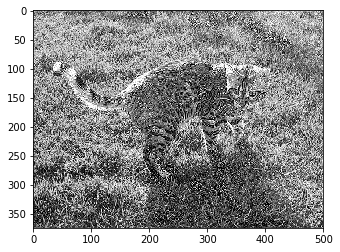

Perturbed image when the iteration is  4


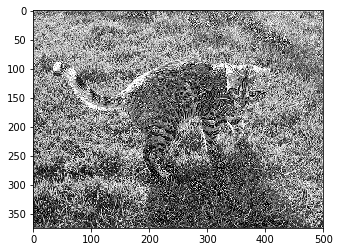

Perturbed image when the iteration is  6


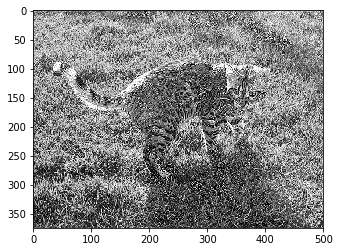

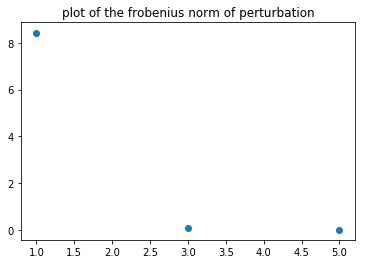

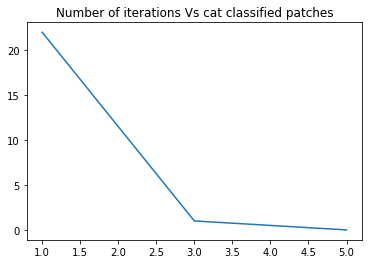

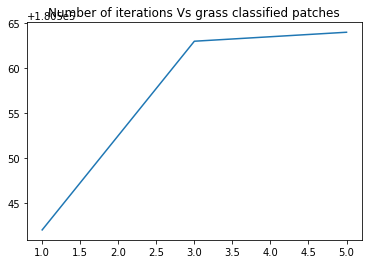

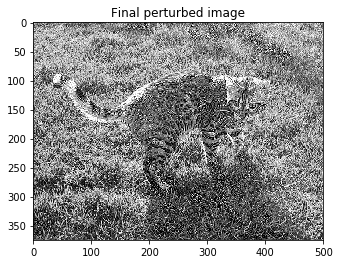

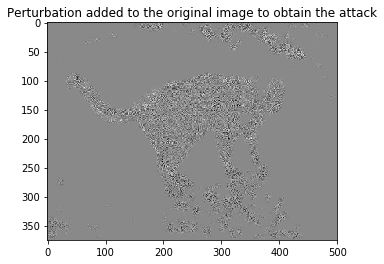

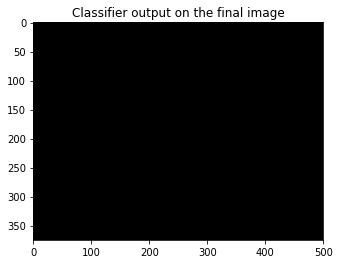

In [14]:
a32=cwattack3(Y,M,N,0.0001,5,2)

From the perturbed images obtained we could see that attack is done for the entire image. Comparing to the quality of the attack from previous exercise, this is more efficient means of attacking as it attack is done to the entire image in a single step which improves the computational time to attack (if repeating the same procedure of the non overlapping patch to the overlapping patch the time taken to converge is high) and also looking at the classifier output of the previous exercise, accuracy of the attack is more. These could also be inferred from the frobenius norm scatter plot of the attack generated.